# Assignment 2
# Bell5820
# 160795820
# bell5820@mylaurier.ca

<b>IMPORTANT: 
explanation of function is below the actual function

ex. 
function, below that is, explanation markdown</b>


<u>Part 1 - Concept Questions</u>
    <u>Neural Nets:</u>
        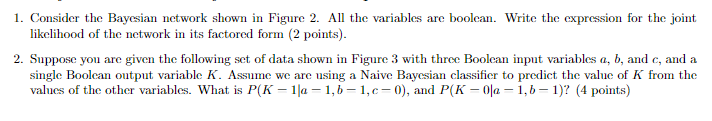
        1) a) g(w7 + w8h +(w1 + w3x1 + w5x2) + w9h(w2 + w4x1 + w6x2))
        
              Express in terms of xi, c, and wi
          1/1+e^(-1(w7+cw8w1+cw9w2+(cw8w3 + cw9w4)x1 + (cw8w5 + cw9w6)x2))
          
b) Yes it is true. If we use lin activation for the hidden units, the output from our hidden units is a combination of our input features. Because our output becomes the input for the last layer, we know that there is an equivalent neural net which has no hidden layers.

   <u>Bayesian Rules and Bayesian Networks:</u>
   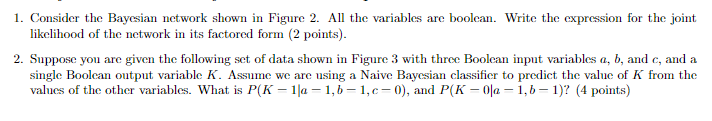
   2a) From observation of the diagram we can see that:
       we will start with a
           a is independent, 
           b is dependent on a, 
           c is dependent on b, 
           d is dependent on both c and f, 
           e is dependent on d, 
           f is dependent on g, 
           g is independent
           
       Using this info we can create the joint likelihood of the network in its factored form which is:
           P(a,b,c,d,e,f,g) = p(a) * P(b|a)*p(c|b) * p(d|c, f) * p(e|d) * p(f|g) * p(g)
           
  2b) Since we only have a=1, b=1, c=0 with k = 1. Therefore, our (p(k=1) where a=1, b=1, c=0) = 1
  
  
      Where a=1, b=1 there are two spots where a = 1, b =1, c = 0 and K = 0 a = 1, b = 1, c = 1, k = 1.
      
      Since k=0 and k=1 are of equal probability in this case both spots have diff k vals.
      
      Therefore, 
      
      p(k=1 | a=1, b=1) = 1/2        

<u>Part 2: Programming Question</u>

In [1]:
#imports
import numpy as np
import pandas as pd
from datetime import datetime
data = pd.read_csv('otto.csv')
val_count = data['target'].value_counts().index.tolist()

print('Number of classes is: ', len(val_count))
print('Number of instances is: ', len(data))

Number of classes is:  9
Number of instances is:  61878


Reads file, converts to DataFrame, Creates Bank of unique classes for further reference

In [2]:
#filtering data
t1 = datetime.now()
clean = pd.DataFrame()
data['target binary'] = ['']*len(data)
for i, row in data.iterrows():
    if row['target'] in val_count:
        index = val_count.index(row['target'])
        data.at[i,'target binary'] = [1.0 if x==index else 0.0 for x,t in enumerate(val_count)]
        #clean = clean.append(row, ignore_index = True)
    else:
        data.drop(index=i,inplace=True)
print(data[['target','target binary']])
print('Time Elapsed:', datetime.now()-t1)

        target                                  target binary
0      Class_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
1      Class_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
2      Class_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
3      Class_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
4      Class_1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
...        ...                                            ...
61873  Class_9  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
61874  Class_9  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
61875  Class_9  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
61876  Class_9  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
61877  Class_9  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

[61878 rows x 2 columns]
Time Elapsed: 0:00:05.456442


Changing Targets into one-hot encoded value for models

In [3]:
#shuffle data and prepare test and training data
shuffle = data[data['target binary']!=''].sample(n=len(data))
train_data = shuffle.iloc[:int(0.8*len(shuffle))]
test_data = shuffle.iloc[int(0.8*len(shuffle)):]

Shuffle data to remove any bias, and split between testing and training data

In [4]:
#KNN Implementation
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=len(val_count))
KNN.fit(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist(), train_data['target binary'].to_list())

KNeighborsClassifier(n_neighbors=9)

Training data on KNN Classifier

In [5]:
#Testing KNN data
test_data['predictionKnn'] = ['']*len(test_data)
for i,row in test_data.iterrows():
    test_data.at[i,'predictionKnn'] = KNN.predict([row[[f'feat_{x+1}' for x in range(93)]].to_list()])[0]
test_data[f'predictionKnn'] = test_data[f'predictionKnn'].apply(lambda x : val_count[list(x).index(1) if 1 in x else 0])
print(test_data[['predictionKnn', 'target']])

<ipython-input-5-e6a1aa16d515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionKnn'] = ['']*len(test_data)


      predictionKnn   target
55442       Class_8  Class_8
31166       Class_5  Class_5
1335        Class_1  Class_1
47579       Class_7  Class_7
36889       Class_2  Class_6
...             ...      ...
52099       Class_8  Class_8
17407       Class_3  Class_2
28122       Class_2  Class_4
29367       Class_5  Class_5
15725       Class_2  Class_2

[12376 rows x 2 columns]


<ipython-input-5-e6a1aa16d515>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'predictionKnn'] = test_data[f'predictionKnn'].apply(lambda x : val_count[list(x).index(1) if 1 in x else 0])


Testing Model on test data, then converting one hot encoded result back to original class.

In [6]:
#Evaluation of KNN
count = 0
for i,row in test_data.iterrows():
    if np.array_equal(row['predictionKnn'],row['target']):
        count += 1
print('accuracy of KNN:', count/len(test_data))

accuracy of KNN: 0.7578377504848093


Comparing predicted results of KNN against known values

In [7]:
#Linear Regression Implementation
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist(), train_data['target binary'].to_list())
print(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Training data on Linear Regression Classifier

In [8]:
#Testing Linear Regression
test_data['predictionLR'] = ['']*len(test_data)
for i,row in test_data.iterrows():
    test_data.at[i,'predictionLR'] = LR.predict([row[[f'feat_{x+1}' for x in range(93)]].to_list()])[0]
test_data['predictionLR'] = test_data['predictionLR'].apply(lambda x:val_count[list(x).index(max(x))])
print(test_data[['predictionLR', 'target']])

<ipython-input-8-5bf65297b4c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionLR'] = ['']*len(test_data)


      predictionLR   target
55442      Class_8  Class_8
31166      Class_5  Class_5
1335       Class_2  Class_1
47579      Class_7  Class_7
36889      Class_2  Class_6
...            ...      ...
52099      Class_8  Class_8
17407      Class_2  Class_2
28122      Class_2  Class_4
29367      Class_5  Class_5
15725      Class_2  Class_2

[12376 rows x 2 columns]


<ipython-input-8-5bf65297b4c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionLR'] = test_data['predictionLR'].apply(lambda x:val_count[list(x).index(max(x))])


Testing Model on test data, then converting one hot encoded result back to original class.

In [9]:
#Evaluation of Linear Regression          **********
count2 = 0
for i,row in test_data.iterrows():
    if np.array_equal(row['predictionLR'],row['target']):
        count2 += 1
print('accuracy of Linear Regression:', count2/len(test_data))

#false since the program is having memory error

accuracy of Linear Regression: 0.718568196509373


Comparing predicted results of Linear Regression against known values

In [10]:
#Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist(), train_data['target binary'].to_list())

RandomForestClassifier()

Building Random Forest Implementation

In [11]:
#Testing of Random Forest
test_data['predictionRF'] = ['']*len(test_data)
for i,row in test_data.iterrows():
    test_data.at[i,'predictionRF'] = RF.predict([row[[f'feat_{x+1}' for x in range(93)]].to_list()])[0]
test_data[f'predictionRF'] = test_data[f'predictionRF'].apply(lambda x : val_count[list(x).index(1) if 1 in x else 0])
print(test_data[['predictionRF', 'target']])

<ipython-input-11-ad05ce4603ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionRF'] = ['']*len(test_data)


      predictionRF   target
55442      Class_8  Class_8
31166      Class_5  Class_5
1335       Class_1  Class_1
47579      Class_2  Class_7
36889      Class_6  Class_6
...            ...      ...
52099      Class_8  Class_8
17407      Class_2  Class_2
28122      Class_2  Class_4
29367      Class_5  Class_5
15725      Class_2  Class_2

[12376 rows x 2 columns]


<ipython-input-11-ad05ce4603ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'predictionRF'] = test_data[f'predictionRF'].apply(lambda x : val_count[list(x).index(1) if 1 in x else 0])


Testing Random forest on testing data

In [12]:
#Evaluation of Random Forest
count3 = 0
for i,row in test_data.iterrows():
    if np.array_equal(row['predictionRF'],row['target']):
        count3 += 1
print('accuracy of RF:', count3/len(test_data))

accuracy of RF: 0.739414996767938


Comparing predicted results of Random Forest against known values

In [13]:
#Neural Net Implementation
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier().fit(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist(), train_data['target binary'].to_list())
print(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist())

C:\Users\PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Building Neural Net

In [28]:
#Testing Neural Net
test_data['predictionNN'] = ['']*len(test_data)
for i,row in test_data.iterrows():
    test_data.at[i,'predictionNN'] = NN.predict([row[[f'feat_{x+1}' for x in range(93)]].to_list()])[0]
test_data[f'predictionNN'] = test_data[f'predictionNN'].apply(lambda x : val_count[list(x).index(1) if 1 in x else 0])
print(test_data[['predictionNN', 'target']])

<ipython-input-28-a049e6ee7005>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionNN'] = ['']*len(test_data)


      predictionNN   target
55442      Class_8  Class_8
31166      Class_5  Class_5
1335       Class_1  Class_1
47579      Class_7  Class_7
36889      Class_9  Class_6
...            ...      ...
52099      Class_8  Class_8
17407      Class_2  Class_2
28122      Class_2  Class_4
29367      Class_5  Class_5
15725      Class_2  Class_2

[12376 rows x 2 columns]


<ipython-input-28-a049e6ee7005>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'predictionNN'] = test_data[f'predictionNN'].apply(lambda x : val_count[list(x).index(1) if 1 in x else 0])


In [ ]:
testing Neural net against test data

In [29]:
#Evaluation of Neural Net
count4 = 0
for i,row in test_data.iterrows():
    if np.array_equal(row['predictionNN'],row['target']):
        count4 += 1
print('accuracy of Neural Net:', count4/len(test_data))

accuracy of Neural Net: 0.7752908855850033


Comparing predicted results of Neural Net against known values

In [16]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist(), train_data['target'].to_list())
print(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Building Naive Bayes, used Multinomial function because of limitation with categorical Naive Bayes, and having labels outside of training data

In [17]:
#Naive Bayes Testing
test_data['predictionNB'] = ['']*len(test_data)

for i,row in test_data.iterrows():
    pred = NB.predict([row[[f'feat_{x+1}' for x in range(93)]].values.tolist()])
    test_data.at[i,'predictionNB'] = pred[0]
print(test_data[['predictionNB', 'target']])

<ipython-input-17-f858b3f0c495>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionNB'] = ['']*len(test_data)


      predictionNB   target
55442      Class_8  Class_8
31166      Class_5  Class_5
1335       Class_1  Class_1
47579      Class_7  Class_7
36889      Class_9  Class_6
...            ...      ...
52099      Class_8  Class_8
17407      Class_2  Class_2
28122      Class_3  Class_4
29367      Class_5  Class_5
15725      Class_2  Class_2

[12376 rows x 2 columns]


Testing Naive Bayes against  testing data

In [18]:
#Naive Bayes Evaluation
count5 = 0
for i,row in test_data.iterrows():
    if np.array_equal(row['predictionNB'],row['target']):
        count5 += 1
print('accuracy of Naive Bayes:', count5/len(test_data))

accuracy of Naive Bayes: 0.6682288299935358


In [ ]:
Comparing predicted results of Naive Bayes against known values

In [19]:
#AdaBoost Implementation
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier().fit(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist(), train_data['target'])
print(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Building AdaBoost 

In [20]:
#AdaBoost Testing
test_data['predictionAB'] = ['']*len(test_data)
for i,row in test_data.iterrows():
    test_data.at[i,'predictionAB'] = AB.predict([row[[f'feat_{x+1}' for x in range(93)]].to_list()])[0]
print(test_data[['predictionAB', 'target']])

<ipython-input-20-8dce25638c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionAB'] = ['']*len(test_data)


      predictionAB   target
55442      Class_8  Class_8
31166      Class_5  Class_5
1335       Class_1  Class_1
47579      Class_8  Class_7
36889      Class_6  Class_6
...            ...      ...
52099      Class_8  Class_8
17407      Class_2  Class_2
28122      Class_4  Class_4
29367      Class_5  Class_5
15725      Class_2  Class_2

[12376 rows x 2 columns]


Testing Adaboost against Test Data

In [21]:
#AdaBoost Evaluation
count6 = 0
for i,row in test_data.iterrows():
    if np.array_equal(row['predictionAB'],row['target']):
        count6 += 1
print('accuracy of AdaBoost:', count6/len(test_data))

accuracy of AdaBoost: 0.7073367808661927


Comparing predicted results of AdaBoost against known values

In [22]:
#Linear SVM Implementation
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
SVM = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
SVM.fit(train_data[[f'feat_{x+1}' for x in range(93)]].values.tolist(), train_data['target'].to_list())

C:\Users\PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

Building Linear SVM

In [23]:
#Linear SVM Testing
test_data['predictionSVM'] = ['']*len(test_data)
for i,row in test_data.iterrows():
    test_data.at[i,'predictionSVM'] = SVM.predict([row[[f'feat_{x+1}' for x in range(93)]].to_list()])[0]
print(test_data[['predictionSVM', 'target']])

<ipython-input-23-24831c79e568>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictionSVM'] = ['']*len(test_data)


      predictionSVM   target
55442       Class_8  Class_8
31166       Class_5  Class_5
1335        Class_1  Class_1
47579       Class_7  Class_7
36889       Class_6  Class_6
...             ...      ...
52099       Class_8  Class_8
17407       Class_2  Class_2
28122       Class_2  Class_4
29367       Class_5  Class_5
15725       Class_2  Class_2

[12376 rows x 2 columns]


Testing SVM against testing Data

In [24]:
#Linear SVM Evaluation
count7 = 0
for i,row in test_data.iterrows():
    if np.array_equal(row['predictionSVM'],row['target']):
        count7 += 1
print('accuracy of Linear SVM:', count7/len(test_data))

accuracy of Linear SVM: 0.7521816418875242


Comparing predicted results of Linear SVM against known values

<u>Part 3: Performance Comparison</u>

               Model  Accuracy
4        Naive Bayes  0.668229
5           AdaBoost  0.707337
1  Linear Regression  0.718568
2      Random Forest  0.739415
6         Linear SVM  0.752182
0                KNN  0.757838
3     Neural Network  0.775291


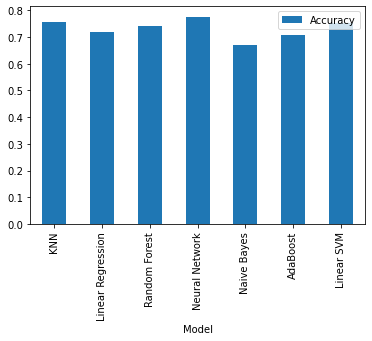

In [30]:
results = pd.DataFrame([
                        {'Model':'KNN','Accuracy':count/len(test_data)},
                        {'Model':'Linear Regression','Accuracy':count2/len(test_data)},
                        {'Model':'Random Forest','Accuracy':count3/len(test_data)},
                        {'Model':'Neural Network','Accuracy':count4/len(test_data)},
                        {'Model':'Naive Bayes','Accuracy':count5/len(test_data)},
                        {'Model':'AdaBoost','Accuracy':count6/len(test_data)},
                        {'Model':'Linear SVM','Accuracy':count7/len(test_data)}
                       ])
print(results.sort_values('Accuracy'))
results.plot(kind='bar',x='Model')

From our Accuracy we can see that our Neural Network is the most accurate of the group

In [31]:
#F1 Measure
from sklearn.metrics import precision_recall_fscore_support
for x in ['Knn', 'LR','RF', 'NN', 'NB', 'AB', 'SVM']:
    info_gain_eval = precision_recall_fscore_support(test_data[f'target'].to_list(),test_data[f'prediction{x}'].to_list())
    print(f'{x}=',info_gain_eval[2][0])


Knn= 0.5207296849087893
LR= 0.12121212121212123
RF= 0.3297644539614561
NN= 0.5501618122977346
NB= 0.3482280431432973
AB= 0.2708333333333333
SVM= 0.41187384044526903


C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


"\nfor x in ['Knn']:\n    info_gain_eval = precision_recall_fscore_support(test_data[f'target binary'].to_list(),test_data[f'prediction{x}'].to_list())\n    print(f'{x}=',info_gain_eval[2][0])\nfor x in ['LR','RF', 'NN']:\n    test_data[f'prediction{x}'] = test_data[f'prediction{x}'].apply(lambda x : val_count[list(x).index(1) if 1 in x else 0])\n    info_gain_eval = precision_recall_fscore_support(test_data[f'target'].to_list(), test_data[f'prediction{x}'].to_list())\n    print(f'{x}=',info_gain_eval[2][0])\n"

From the above we can see that the best algorithm is Neural Network as it has the highest F Score, meaning that it has the best balance between its precision and recall.

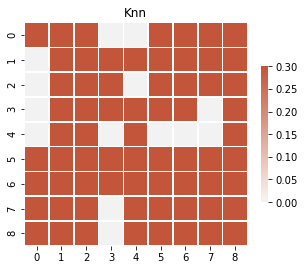

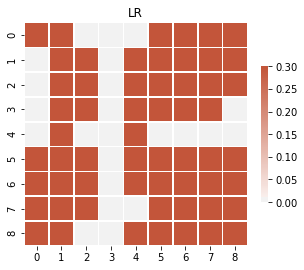

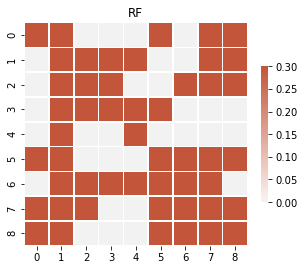

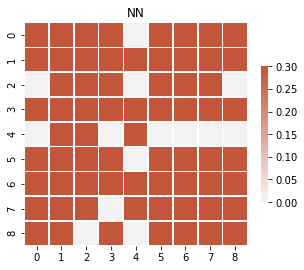

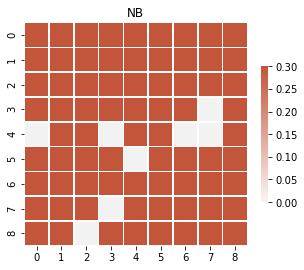

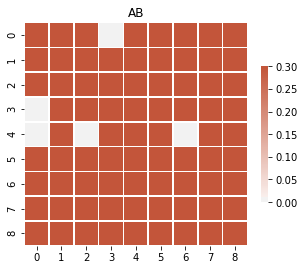

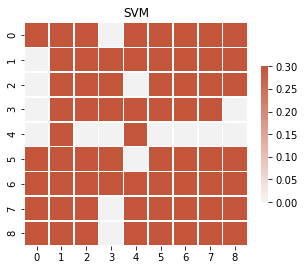

In [32]:
#Heatmap
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for x in ['Knn', 'LR','RF', 'NN', 'NB', 'AB', 'SVM']:
    info_gain_conf = confusion_matrix(test_data[f'target'].to_list(), test_data[f'prediction{x}'].to_list())
    f, ax = plt.subplots(figsize=(5,5))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    ax.set_title(x)
    sns.heatmap(info_gain_conf, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

Based on our heat maps we can see that there are correlations between:
  AB, NB because we can see from their heat maps they share a similar appearance.  

I came to the decision of the Neural Network being the highest performing model. The closest in comparison was the K Nearest Neighbours algorithm. In deciding between the two, I looked at accuracy, f-score, and their heat maps. They are close in all of these sections, however neural network seems to outperform the K Nearest Neighbours Algorithm.